<center><img src='https://sedigitalylanzate.es/wp-content/uploads/2019/03/logoeoiok-e1552040050697.png' width="500"></center>

<center><img src='https://m.media-amazon.com/images/S/aplus-media-library-service-media/0abb9e09-3550-47f8-ae9a-92385718a879.__CR0,0,2500,750_PT0_SX600_V1___.png' width="500"></center>


# Contexto del ejercicio
## Segunda prueba en RecomiendaME (RME)

Esperamos que hayas pordido resolver sin problemas el primer ejercicio de tu prueba de acceso a nuestra startup. 

Este segundo paso es un poco más complejo, así que preparate. 

Vamos a juntar dos fuentes de información:

- Por un lado tenemos la información que descargamos en Twitter, que va a ser la base de películas que vamos a etiquetar. 
- Por otro lado vamos a aprovechas el trabajo que han hecho en Movielens para desarrollar un genoma de un montón de contenidos. 

Este genoma lo que nos va a ofrecer es un etiquetado bastante amplio para los contenidos que tenemos en nuestra base (desgraciadamente no están todos, pero conocemos esa limitación y la asumimos). 

Las etiquetas vienen con una relevancia, puedes usar ese valor para fijar un criterio que te permita no usar todas. 


## Análisis a desarrollar

Tienes que generar un función que dado un contenido devuelva los 6 contenidos similares basado en el etiqueta. 

Igual que en el ejercicio anterior, has tenido la suerte de que los ingenieros de datos te han echado una mano. Te han dejado toda la información resumida en un csv. 

El fichero en este caso es:

**`movies_etiquetado.csv`**

Las columnas son:
- imdb_id
- imdb_title
- genre. Son los géneros asociados a la película
- tag. La etiqueta que vamos a usar para relacionar contenidos.
- relevance. Como de fuerte es la relación entre la etiqueta y el contenido. Recuerda que esta info no es de nuestra empresa y puede no ser tan fina como nos gustaría. 


**Nota:** De cara al informe busca algún ejemplo que te parezca que haya quedado bien de cara a enseñarlo. 

### Suerte!

**Ayuda**

Para pasar las etiquetas de filas a un array en una columna, puedes usar este código

`.groupby(['imdb_title','imdb_id'])['tag'].apply(list).reset_index(name='etiquetas')`

Para convertirlas de un array a un texto separado por espacios tienes un ejemplo en la teoría.

In [ ]:
pip install -U kaleido

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/local/lib/python3.9/dist-packages/pip/_intern

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly==5.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.tools as tls
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
import chart_studio.plotly as py


In [ ]:
import plotly.graph_objs as go
from textblob import TextBlob
import plotly.graph_objs as go
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go
from venn import venn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import chart_studio
chart_studio.tools.set_credentials_file(username='Rafavermar', api_key='RJYRQwDIa1EvWkoDm4RQ')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
etiquetas_movies = pd.read_csv('/content/drive/MyDrive/MASTER EOI/16. MODULO 16. Sistemas recomendadores de productos/Ejercicios_Entregas/material_apoyo/movies_etiquetado.csv')

**OBTENCIÓN DE 6 RECOMENDACIONES BASADAS EN EL CONTENIDO (ETIQUETAS) PARA UNA PELÍCULA ELEGIDA AL AZAR**



```
# 
# Agrupar etiquetas por título y género
etiquetas = etiquetas_movies.groupby(['imdb_title', 'imdb_id', 'genre'])['tag'].apply(list).reset_index(name='etiquetas')

# Convertir listas de etiquetas a texto separado por espacios
etiquetas['etiquetas'] = etiquetas['etiquetas'].apply(lambda x: ' '.join(x))

# Calcular similitud coseno entre las etiquetas de las películas
tfidf = TfidfVectorizer()
etiquetas_matrix = tfidf.fit_transform(etiquetas['etiquetas'])
similarity_matrix = cosine_similarity(etiquetas_matrix)

# Función para obtener las películas similares
def get_similar_movies(title):
    # Obtener índice de la película
    idx = etiquetas.index[etiquetas['imdb_title'] == title].tolist()[0]
    
    # Obtener similitud coseno entre la película y todas las demás
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Ordenar películas por similitud coseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener índices de las 6 películas más similares
    sim_scores = sim_scores[1:7]
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver títulos, géneros y similitudes de las películas más similares
    return [(etiquetas['imdb_title'].iloc[i], etiquetas['genre'].iloc[i], sim_scores[j][1]) for j, i in enumerate(movie_indices)]

# Obtener título aleatorio
title = random.choice(etiquetas['imdb_title'].tolist())

# Obtener títulos, géneros y similitudes de las películas recomendadas
recommendations = get_similar_movies(title)

# Crear diccionario con los datos de las películas recomendadas
rec_dict = {'Título': [], 'Género': [], 'Similitud': []}
for movie, genre, similarity in recommendations:
    rec_dict['Título'].append(movie)
    rec_dict['Género'].append(genre)
    rec_dict['Similitud'].append(similarity)

# Convertir diccionario en dataframe y mostrarlo
rec_df = pd.DataFrame.from_dict(rec_dict)
print("Estas son las recomendaciones para " + title + ":")
rec_df

```



**DATAFRAME CON LAS 6 RECOMENDACIONES MOSTRANDO LAS ETIQUETAS DE CADA PELÍCULA RECOMENDADA**

In [ ]:
# Agrupar etiquetas por título y género
etiquetas = etiquetas_movies.groupby(['imdb_title', 'imdb_id', 'genre'])['tag'].apply(list).reset_index(name='etiquetas')

# Convertir listas de etiquetas a texto separado por espacios
etiquetas['etiquetas'] = etiquetas['etiquetas'].apply(lambda x: ' '.join(x))

# Calcular similitud coseno entre las etiquetas de las películas
tfidf = TfidfVectorizer()
etiquetas_matrix = tfidf.fit_transform(etiquetas['etiquetas'])
similarity_matrix = cosine_similarity(etiquetas_matrix)

# Función para obtener las películas similares
def get_similar_movies(title_random):
    # Obtener índice de la película
    idx = etiquetas.index[etiquetas['imdb_title'] == title_random].tolist()[0]
    
    # Obtener similitud coseno entre la película y todas las demás
    sim_scores = list(enumerate(similarity_matrix[idx]))
    
    # Ordenar películas por similitud coseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener índices de las 6 películas más similares
    sim_scores = sim_scores[1:7]
    movie_indices = [i[0] for i in sim_scores]
    
    # Obtener etiquetas de las películas más similares
    tag_list = []
    for i in movie_indices:
        tag_list.append(etiquetas['etiquetas'].iloc[i])
    
    # Devolver títulos, géneros, similitudes y etiquetas de las películas más similares
    return [(etiquetas['imdb_title'].iloc[i], etiquetas['genre'].iloc[i], sim_scores[j][1], tag_list[j]) for j, i in enumerate(movie_indices)]

# Obtener título aleatorio
title_random = random.choice(etiquetas['imdb_title'].tolist())

# Obtener títulos, géneros, similitudes y etiquetas de las películas recomendadas
recommendations = get_similar_movies(title_random)

# Crear diccionario con los datos de las películas recomendadas
rec_dict = {'Título': [], 'Género': [], 'Similitud': [], 'Etiquetas': []}
for movie, genre, similarity, tags in recommendations:
    rec_dict['Título'].append(movie)
    rec_dict['Género'].append(genre)
    rec_dict['Similitud'].append(similarity)
    rec_dict['Etiquetas'].append(tags)

# Convertir diccionario en dataframe y mostrarlo
rec_df = pd.DataFrame.from_dict(rec_dict)

def get_movie_genre(df, title_random):
    return df.loc[df['imdb_title'] == title_random, 'genre'].iloc[0]
    genre = get_movie_genre(etiquetas_movies, title_random)

# Obtener género de la película aleatoria
genre = get_movie_genre(etiquetas_movies, title_random)

print("Estas son las recomendaciones para " + title_random + "(" + genre + ")" ":")
rec_df


Estas son las recomendaciones para A Terrible Night(Short|Comedy|Horror):


,Título,Género,Similitud,Etiquetas
0,Faithless,Drama|Romance,0.518695,based on a book based on a true story based on...
1,Blue,Biography|Drama,0.488224,18th century 1970s adaptation adapted from:boo...
2,Black Roses,Horror|Music,0.486413,adaptation adapted from:book based on a book b...
3,Story of a Junkie,Drama,0.481278,adaptation adapted from:book bad ending based ...
4,The Magnificent Ambersons,Drama|Romance,0.476093,adaptation adolescence adventure affectionate ...
5,Gang Related,Action|Crime|Drama|Romance|Thriller,0.474175,adaptation adapted from:book addiction adulter...


# **INSIGHTS SOBRE EL CONJUNTO DE DATOS DE 6 RECOMENDACIONES**

> GRÁFICO DE VENN PARA ESTUDIAR LOS PUNTOS DE INTERSECCION (ETIQUETAS) ENTRE LAS 6 PELICULAS RECOMENDADAS

<Axes: >

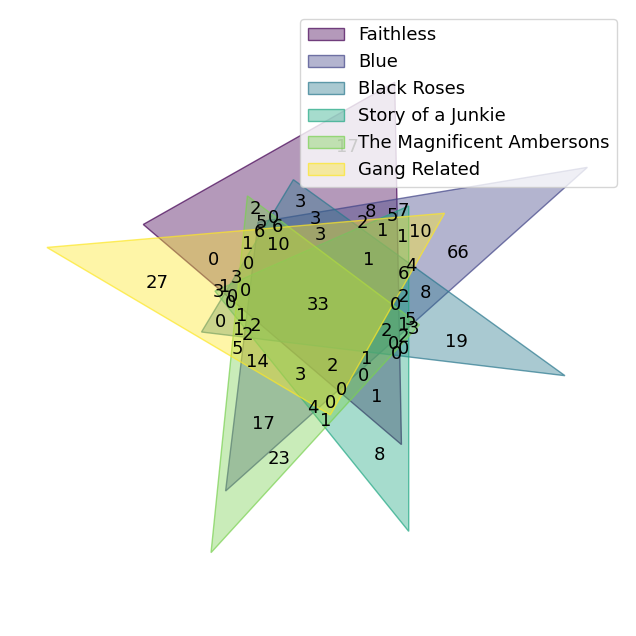

In [ ]:


# Crear un diccionario de conjuntos de etiquetas por película
label_sets = {}
for i, row in rec_df.iterrows():
    title = row["Título"]
    labels = set(row["Etiquetas"].split())
    label_sets[title] = labels

# Crear el diagrama de Venn
venn(label_sets)

#---- Upload de grafica a plotly charStudio
#py.plot(fig, filename='VennEtiquetas', auto_open=True)


> IMPRIMIENDO LAS ETIQUETAS EN COMÚN ENTRE LAS 6 RECOMENDACIONES

In [ ]:
# Obtener los conjuntos de etiquetas de las películas
label_sets = []
for i, row in rec_df.iterrows():
    labels = set(row["Etiquetas"].split())
    label_sets.append(labels)

# Calcular la intersección de los conjuntos de etiquetas
common_labels = set.intersection(*label_sets)

# Imprimir las etiquetas en común
print(common_labels)


{'runaway', 'catastrophe', 'unlikely', 'drama', 'movie', 'storytelling', 'feel-good', 'beautiful', 'melancholic', 'acting', 'great', 'interesting', 'friendships', 'a', 'based', 'death', 'original', 'mentor', 'emotional', 'on', '&', 'story', 'ending', 'scenery', 'life', 'destiny', 'friendship', 'book', 'very', 'good', 'touching', 'not', 'funny'}


> GRÁFICO DE LA SIMILITUD DE CADA UNA DE LAS 6 PELÍCULAS RECOMENDADAS CON LA PELÍCULA ELEGIDA AL AZAR

In [ ]:
# Crear lista con títulos de películas y similitudes
titles = [movie[0] for movie in recommendations]
similarities = [movie[2] for movie in recommendations]
genero = [movie[1] for movie in recommendations]
# Agregar título de la película de origen al inicio de las listas
#titles.insert(0, title)
#similarities.insert(0, 1)

# Crear figura de gráfico de barras
fig = go.Figure()

# Agregar barras al gráfico
fig.add_trace(go.Bar(
    x=titles,
    y=similarities,
    marker=dict(color='rgb(158,202,225)',
                line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
))


# Personalizar diseño del gráfico
fig.update_layout(
    title=f"Películas recomendadas para {title_random}",
    xaxis_title="Película",
    yaxis_title="similarities",
    plot_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
    font=dict(family="Courier New, monospace", size=14, color="black")
)

# Mostrar gráfico
fig.show()



> GRÁFICO DE LA SIMILITUD DE CADA UNA DE LAS 6 PELÍCULAS RECOMENDADAS CON LA PELÍCULA ELEGIDA AL AZAR Y SU GÉNERO

In [ ]:


import chart_studio.tools as tls



# Crear lista con títulos de películas, similitudes y géneros
titles = [movie[0] for movie in recommendations]
similarities = [movie[2] for movie in recommendations]
generos = [movie[1] for movie in recommendations]

# Agregar título de la película de origen al inicio de las listas
#titles.insert(0, title)
#similarities.insert(0, 1)
#generos.insert(0, genre)

# Crear figura de gráfico de dispersión
fig = go.Figure()

# Agregar puntos al gráfico
fig.add_trace(go.Scatter(
    x=similarities,
    y=generos,
    mode='markers',
    marker=dict(
        color=similarities,
        size=15,
        colorscale='Viridis',
        showscale=True,
        line=dict(
            color='rgba(8,48,107,1)',
            width=1.5
        )
    ),
    text=titles,
    hovertemplate=
    "<b>%{text}</b><br><br>" +
    "Similitud: %{x}<br>" +
    "Género: %{y}<br>"
))

# Personalizar diseño del gráfico
fig.update_layout(
    title=f"Películas recomendadas para '{title_random}'",
    xaxis_title="Similitud",
    yaxis_title="Género",
    plot_bgcolor='rgba(255, 255, 255, 0.9)',
    font=dict(family="Courier New, monospace", size=14, color="black"),
    margin=dict(l=50, r=50, b=50, t=80),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    ),
)


# Mostrar gráfico
fig.show()

#---- Upload de grafica a plotly charStudio
py.plot(fig, filename='Similitudscatter', auto_open=True)

'https://plotly.com/~Rafavermar/63/'

> LAS ETIQUETAS MAS IMPORTANTES EN LA SIMILITUD ENTRE LAS 6 PELICULAS RECOMENDADAS Y LA PELÍCULA ELEGIDA AL AZAR

In [ ]:
# Obtener índice de la película elegida
chosen_idx = etiquetas.index[etiquetas['imdb_title'] == title_random].tolist()[0]

# Obtener los índices de las 6 películas recomendadas
recommendations_indices = [etiquetas.index[etiquetas['imdb_title'] == rec[0]].tolist()[0] for rec in recommendations]

# Obtener los términos más importantes en la similitud entre las películas
important_terms = tfidf.inverse_transform(etiquetas_matrix[chosen_idx])[0]
for idx in recommendations_indices:
    important_terms = set(important_terms).intersection(set(tfidf.inverse_transform(etiquetas_matrix[idx])[0]))

# Imprimir los términos más importantes
print("Los términos más importantes en la similitud entre las 6 películas recomendadas y la película", title_random, "son:")
print(list(important_terms))


Los términos más importantes en la similitud entre las 6 películas recomendadas y la película A Terrible Night son:
['runaway', 'catastrophe', 'drama', 'movie', 'storytelling', 'beautiful', 'melancholic', 'acting', 'great', 'interesting', 'death', 'based', 'original', 'mentor', 'on', 'story', 'ending', 'scenery', 'life', 'destiny', 'friendship', 'very', 'book', 'good', 'touching', 'feel', 'not', 'funny']


> GRÁFICO. ETIQUETAS MAS RELEVANTES PARA LAS LAS PELÍCULAS RECOMENDADAS A LA PELÍCULA ELEGIDA AL AZAR


In [ ]:


# Obtener los tags de la película elegida
tags_elegida = etiquetas[etiquetas['imdb_title'] == title_random]['etiquetas'].tolist()[0].split()

# Obtener los tags de las películas recomendadas y filtrarlos por aquellos coincidentes con la película elegida
tags_recomendadas = [t.split('|') for t in etiquetas_movies[etiquetas_movies['imdb_title'].isin([r[0] for r in recommendations])]['tag'].tolist()]
tags_recomendadas = [t for sublist in tags_recomendadas for t in sublist]
tags_recomendadas = [t for t in tags_recomendadas if t in tags_elegida]
tags_freq = {t:tags_recomendadas.count(t) for t in set(tags_recomendadas)}
tags_freq = {k: v for k, v in sorted(tags_freq.items(), key=lambda item: item[1], reverse=True)}

# Crear figura de gráfico de barras
fig = go.Figure()

# Agregar barras al gráfico
fig.add_trace(go.Bar(
    x=list(tags_freq.values()),
    y=list(tags_freq.keys()),
    orientation='h',
    marker_color='rgb(158,202,225)',
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5,
    opacity=0.6,
    text=list(tags_freq.values())
))

# Personalizar diseño del gráfico
fig.update_layout(
    title=f"Tags más relevantes para las películas recomendadas de " + title_random + " (" + genre + ")",
    xaxis_title="Frecuencia",
    yaxis_title="Tags",
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Roboto, sans-serif", size=14, color="black")
)


# Mostrar gráfico
fig.show()

#---- Upload de grafica a plotly charStudio
py.plot(fig, filename='EtiquetasrelevantesElegida', auto_open=True)

'https://plotly.com/~Rafavermar/65/'

> GRÁFICO. CONTEO DE PELÍCULAS POR GÉNERO DEL DATASET ORIGINAL

In [ ]:


# Obtener una lista de los géneros únicos
genres_list = []
for genres in etiquetas_movies['genre']:
    if isinstance(genres, str): # asegurarse de que solo se procesen los valores que son strings
        genres_list += genres.split('|')
unique_genres = list(set(genres_list))

# Contar la cantidad de películas para cada género único
genre_counts = {}
for genre in unique_genres:
    count = 0
    for genres in etiquetas_movies['genre']:
        if isinstance(genres, str) and genre in genres:
            count += 1
    genre_counts[genre] = count

# Ordenar los valores de mayor a menor
sorted_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}

# Crear la gráfica de barras horizontales
fig = px.bar(x=list(sorted_counts.values()), y=list(sorted_counts.keys()), orientation='h')

# Añadir títulos a los ejes
fig.update_layout(xaxis_title="Cantidad de películas", yaxis_title="Género")

# Mostrar la gráfica
fig.show()

#---- Upload de grafica a plotly charStudio
#py.plot(fig, filename='relacionConteoYScoreRecomendaciones', auto_open=True)

> GRÁFICO. CONTEO DE PELÍCULAS POR GÉNERO DEL DATASET DE 6 RECOMENDACIONES

In [ ]:


# Obtener una lista de los géneros únicos
genres_list = []
for genres in rec_df['Género']:
    if isinstance(genres, str): # asegurarse de que solo se procesen los valores que son strings
        genres_list += genres.split('|')
unique_genres = list(set(genres_list))

# Contar la cantidad de películas para cada género único
genre_counts = {}
for genre in unique_genres:
    count = 0
    for genres in rec_df['Género']:
        if isinstance(genres, str) and genre in genres:
            count += 1
    genre_counts[genre] = count

# Ordenar la lista de tuplas de mayor a menor según la cantidad de películas
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Crear listas separadas para los géneros y la cantidad de películas en el orden ordenado
sorted_genre_names = [x[0] for x in sorted_genres]
sorted_genre_counts = [x[1] for x in sorted_genres]

# Crear la gráfica de barras horizontales
fig = px.bar(x=sorted_genre_counts, y=sorted_genre_names, orientation='h')

# Añadir títulos a los ejes
fig.update_layout(xaxis_title="Cantidad de películas", yaxis_title="Género")

# Mostrar la gráfica
fig.show()

#---- Upload de grafica a plotly charStudio
py.plot(fig, filename='ConteoGeneroPeliculas', auto_open=True)

'https://plotly.com/~Rafavermar/67/'

> GRÁFICO. NUBE DE ETIQUETAS PARA EL DATASET ORIGINAL

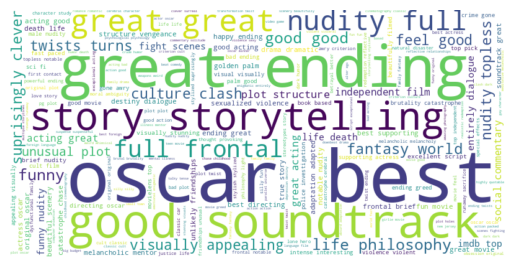

In [ ]:


# Este código crea una nube de tags con todas las etiquetas del dataframe etiquetas. 


# Obtener todas las etiquetas
all_tags = ' '.join(etiquetas['etiquetas'].tolist())

# Crear nube de tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Mostrar nube de tags
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#---- Upload de grafica a plotly charStudio
#py.plot(fig, filename='relacionConteoYScoreRecomendaciones', auto_open=True)


> GRÁFICO. NUBE DE ETIQUETAS PARA EL DATASET DE 6 RECOMENDACIONES

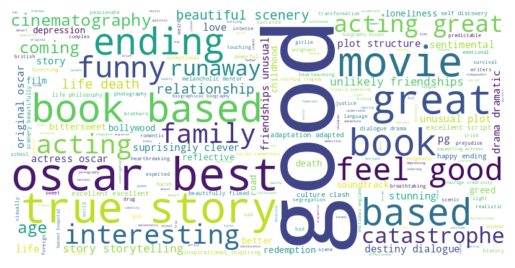

In [ ]:


# Crear una lista de títulos de películas recomendadas
titles = [movie[0] for movie in recommendations]

# Filtrar la tabla de etiquetas para las películas recomendadas
filtered_etiquetas = etiquetas[etiquetas['imdb_title'].isin(titles)]

# Obtener todas las etiquetas relevantes para las películas recomendadas
all_tags = ' '.join(filtered_etiquetas['etiquetas'].tolist())

# Crear nube de tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Mostrar nube de tags
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#---- Upload de grafica a plotly charStudio
#py.plot(fig, filename='relacionConteoYScoreRecomendaciones', auto_open=True)


# **INSIGHTS DEL CONJUNTO DE ETIQUETAS EN EL DATASET DE LAS 6 RECOMENDACIONES**

> LAS 20 ETIQUETAS MAS COMUNES

In [ ]:

all_tags = ' '.join(filtered_etiquetas['etiquetas'].tolist())

tags_list = all_tags.split() # Convertir la cadena a una lista de palabras

tag_counts = Counter(tags_list) # Contar la frecuencia de cada palabra

# Mostrar las 20 palabras más comunes y sus frecuencias
for tag, count in tag_counts.most_common(20):
    print(tag, count)


good 27
story 26
based 23
on 23
oscar 21
great 20
(best 16
book 15
true 15
acting 15
ending 15
life 15
movie 14
a 12
very 12
death 10
funny 10
drama 9
beautiful 8
excellent 8


> GRÁFICO. LAS 15 ETIQUETAS MAS COMUNES Y SU FRECUENCIA DE APARICIÓN

In [ ]:

all_tags = ' '.join(filtered_etiquetas['etiquetas'].tolist())
tags_list = all_tags.split()
tag_counts = Counter(tags_list)

# Obtener los datos de las palabras y sus frecuencias
data = tag_counts.most_common(15)
words = [item[0] for item in data]
counts = [item[1] for item in data]

# Crear la figura de Plotly
fig = go.Figure(data=[go.Bar(x=words, y=counts)])

# Añadir etiquetas y títulos
fig.update_layout(title='Las 15 etiquetas más comunes',
                  xaxis_title='Etiquetas',
                  yaxis_title='Frecuencia')

# Mostrar la figura de Plotly
fig.show()

#---- Upload de grafica a plotly charStudio
py.plot(fig, filename='15EtiquetasFrecuencia', auto_open=True)

'https://plotly.com/~Rafavermar/69/'

> ANÁLISIS DE SENTIMIENTO BASADO EN EL CONJUNTO DE ETIQUETAS DEL DATASET

In [ ]:


all_tags = ' '.join(etiquetas_movies['tag'].tolist())

tags_list = all_tags.split() # Convertir la cadena a una lista de palabras

sentiment_scores = []

# Calcular la polaridad de cada palabra en la lista
for tag in tags_list:
    blob = TextBlob(tag)
    sentiment_scores.append(blob.sentiment.polarity)

# Calcular el puntaje de sentimiento general de la lista
overall_sentiment = sum(sentiment_scores) / len(sentiment_scores)

print("Puntaje de sentimiento general:", overall_sentiment)


Puntaje de sentimiento general: 0.053160388254808635


Este código está calculando la puntuación de sentimiento general de una lista de palabras. Primero, convierte una cadena de texto en una lista de palabras utilizando el método split(). Luego, para cada palabra en la lista, se calcula su polaridad de sentimiento utilizando la librería TextBlob. La polaridad de sentimiento es un número entre -1 y 1 que indica qué tan positiva o negativa es una palabra en términos de sentimiento. Por ejemplo, una palabra con polaridad 1 es muy positiva, mientras que una palabra con polaridad -1 es muy negativa.

Una vez que se han calculado las polaridades de todas las palabras en la lista, el código promedia las puntuaciones de sentimiento para obtener la puntuación de sentimiento general de la lista. Esta puntuación de sentimiento general es un número entre -1 y 1 que indica lo positiva o negativa que es la lista de palabras en su conjunto.

El resultado impreso en la pantalla muestra la puntuación de sentimiento general de la lista. Si la puntuación es positiva, significa que la lista de palabras tiene un sentimiento más positivo que negativo, mientras que si la puntuación es negativo, significa que la lista de palabras tiene un sentimiento más negativo que positivo. Si la puntuación es cercana a cero, significa que la lista de palabras tiene un sentimiento neutral o ambiguo.

> GRÁFICO. PUNTUACIÓN DEL SENTIMIENTO GENERAL DE LAS ETIQUETAS

In [ ]:

# Crear un gráfico de medidor del puntaje de sentimiento general
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = overall_sentiment,
    title = {'text': "Puntuación de Sentimiento General de las Etiquetas"},
    gauge = {
        'axis': {'range': [-1, 1], 'tickmode': 'array', 'tickvals': [-1, -0.5, 0, 0.5, 1]},
        'bar': {'color': "red"},
        'steps': [
            {'range': [-1, 0], 'color': "gray"},
            {'range': [0, 1], 'color': "lightgray"}
        ],
    },
))

fig.show()
fig.write_image("sentiment_score.png")


> CONTEO DE ETIQUTAS POR GÉNERO DE LAS PELÍCULAS

In [ ]:
# Crear un marco de datos con la lista de etiquetas y el género de la película
df = pd.DataFrame({'etiquetas': tags_list, 'genero': genre})

# Agrupar los elementos por género y etiqueta, contar la frecuencia de cada etiqueta y convertir a DataFrame
genre_counts = df.groupby(['genero', 'etiquetas'])['etiquetas'].count().reset_index(name="count")

# Mostrar los 10 géneros más comunes y sus etiquetas más comunes
for group in genre_counts.groupby('genero'):
    genre = group[0]
    data = group[1].nlargest(10, 'count')
    for index, row in data.iterrows():
        print(genre, row['etiquetas'], row['count'])




Crime good 27
Crime story 26
Crime based 23
Crime on 23
Crime oscar 21
Crime great 20
Crime (best 16
Crime acting 15
Crime book 15
Crime ending 15


> GRÁFICA. CONTEO DE ETIQUETAS POR GÉNERO DE LA PELÍCULA ELEGIDA AL AZAR

In [ ]:


# Crear un marco de datos con la lista de etiquetas y el género de la película
df = pd.DataFrame({'etiquetas': tags_list, 'genero': genre})

# Agrupar los elementos por género y etiqueta, contar la frecuencia de cada etiqueta y convertir a DataFrame
genre_counts = df.groupby(['genero', 'etiquetas'])['etiquetas'].count().reset_index(name="count")

# Mostrar los 10 géneros más comunes y sus etiquetas más comunes
for group in genre_counts.groupby('genero'):
    genre = group[0]
    data = group[1].nlargest(10, 'count')
    
    # Crear la figura con Plotly
    fig = px.bar(data, x='genero', y='count', color='etiquetas',
                 title=f'Top 10 etiquetas por género ({genre})')
    
    # Mostrar la figura
    fig.show()

#---- Upload de grafica a plotly charStudio
py.plot(fig, filename='10GenerosyEtiquetas', auto_open=True)

'https://plotly.com/~Rafavermar/71/'



---



# **INTENTO FALLIDO DE REALIZACIÓN DE GRAFO**

In [ ]:
import networkx as nx

all_tags = ' '.join(filtered_etiquetas['etiquetas'].tolist())

tags_list = all_tags.split() # Convertir la cadena a una lista de palabras

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Agregar los nodos al grafo
for tag in set(tags_list):
    G.add_node(tag)

# Agregar las aristas al grafo
for i in range(len(tags_list) - 1):
    source = tags_list[i]
    target = tags_list[i + 1]
    if G.has_edge(source, target):
        G[source][target]['weight'] += 1
    else:
        G.add_edge(source, target, weight=1)

# Mostrar las 10 transiciones más comunes en el grafo
for source, target, weight in sorted(G.edges(data='weight'), key=lambda x: x[2], reverse=True)[:10]:
    print(source, '->', target, ':', weight)



oscar -> (best : 35
based -> on : 11
actress) -> oscar : 9
(best -> supporting : 9
nudity -> (full : 7
world -> war : 7
suprisingly -> clever : 6
unusual -> plot : 6
top -> 250 : 6
plot -> structure : 6


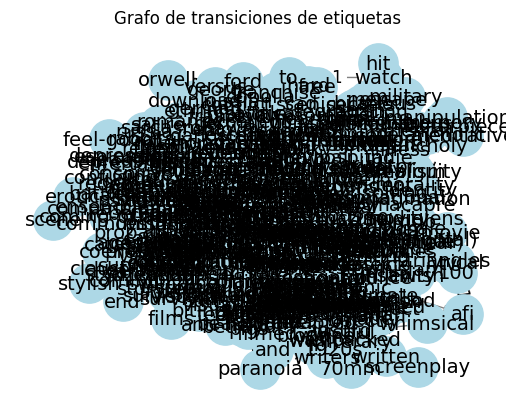

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Configurar el diseño del gráfico con spring_layout
pos = nx.spring_layout(G)

# Añadir etiquetas a los nodos
labels = {node: node for node in G.nodes()}

# Dibujar los nodos y las aristas
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G, pos, edge_color='gray')

# Añadir etiquetas a los nodos
nx.draw_networkx_labels(G, pos, labels, font_size=14)

# Añadir etiquetas a las aristas
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12)

# Ajustar los límites del gráfico y mostrarlo
plt.axis('off')
plt.title('Grafo de transiciones de etiquetas')
plt.show()


In [ ]:
# intento fallido para generar csv de Nodos y csv de aristas para crear un grafo de relaciones con Gephi

import pandas as pd

# Leer archivo CSV con los datos de películas
df = etiquetas_movies.copy()

# Crear DataFrame para nodos
df_nodos = df[['imdb_title']].drop_duplicates()
df_nodos['id'] = df_nodos['imdb_title']
df_nodos['label'] = df_nodos['imdb_title']
df_nodos['tipo'] = 'imdb_title'
df_nodos = df_nodos[['id', 'label', 'tipo']]

# Crear DataFrame para aristas
df_aristas = pd.DataFrame(columns=['source', 'target', 'relevance', 'num_tags'])

# Crear diccionario para almacenar tags de cada película
tags_dict = {}
for i, row in df.iterrows():
    tags_dict[row['imdb_title']] = set(row['tag'].split('|'))

# Iterar sobre cada par de películas
for i in range(len(df)):
    pelicula_i = df.loc[i, 'imdb_title']
    tags_i = tags_dict[pelicula_i]
    for j in range(i + 1, len(df)):
        pelicula_j = df.loc[j, 'imdb_title']
        tags_j = tags_dict[pelicula_j]
        tags_comunes = tags_i.intersection(tags_j)
        if len(tags_comunes) > 0:
            relevance = (df.loc[i, 'relevance'] + df.loc[j, 'relevance']) / 2
            num_tags = len(tags_comunes)
            df_aristas = df_aristas.append({'source': pelicula_i, 'target': pelicula_j, 'relevance': relevance, 'num_tags': num_tags}, ignore_index=True)

# Agrupar aristas por tag
df_aristas_agrupadas = df_aristas.groupby(['source', 'target']).agg({'relevance': 'mean', 'num_tags': 'sum'}).reset_index()
df_aristas_agrupadas = df_aristas_agrupadas[df_aristas_agrupadas['num_tags'] > 0]

# Crear DataFrame para nodos y tags
df_nodos_tags = pd.DataFrame(columns=['id', 'label', 'tipo'])
for i, row in df_aristas_agrupadas.iterrows():
    source = row['source']
    target = row['target']
    relevance = row['relevance']
    num_tags = row['num_tags']
    tags = tags_dict[source].intersection(tags_dict[target])
    for tag in tags:
        tag_id = f"{source}_{target}_{tag}"
        df_nodos_tags = df_nodos_tags.append({'id': tag_id, 'label': tag, 'tipo': 'tag'}, ignore_index=True)
        df_aristas = df_aristas.append({'source': source, 'target': tag_id, 'relevance': relevance, 'num_tags': num_tags}, ignore_index=True)
        df_aristas = df_aristas.append({'source': target, 'target': tag_id, 'relevance': relevance, 'num_tags': num_tags}, ignore_index=True)

# Unir nodos de películas y tags
df_nodos = df_nodos.append(df_nodos_tags)

# Guardar nodos y aristas en archivos CSV
df_nodos.to_csv('nodos.csv', index=False)
df_aristas.to_csv('aristas.csv', index=False)


Se han truncado las últimas 5000 líneas del flujo de salida.
<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-42-0f0eeace4400>:32: FutureWarning:

The frame.append method is depre

KeyboardInterrupt: ignored